## Unified Modeling Dataset Creation

To build a Supervised Mental Health chatbot capable of understanding user inputs and generating meaningful responses, we begin by unifying our three preprocessed datasets into a single modeling dataset. The goal is to standardize the format across datasets so we can train machine learning models for intent classification, emotion recognition, and response prediction.

### Source Datasets

1. **Dataset 1: Mental Health Counseling Conversations**
   - Contains real user input (counseling context) and therapist responses.
   - Preprocessed columns: `Cleaned_Context`, `Cleaned_Response`.

2. **Dataset 2: Mental Health FAQ for Chatbot**
   - Contains FAQ-style questions and expert answers.
   - Preprocessed columns: `Cleaned_Questions`, `Cleaned_Answers`.
   - There are No explicit category labels provided.

3. **Dataset 3: Sentiment Analysis for Mental Health**
   - Contains short user statements labeled with emotional states such as Anxiety, Depression, etc.
   - Preprocessed columns: `Cleaned_Statement`, `Encoded_Status`.
   - This does not include a response column.

### Preprocessing and Labeling Steps

1. **Dataset 1: Counseling Conversations**
   - Renamed `Cleaned_Context` to `Input` and `Cleaned_Response` to `Response`.
   - Added fixed `Intent` column with value `"general_support"`.
   - Assigned `Label = "general_support"` to all rows.

2. **Dataset 2: FAQ**
   - Renamed `Cleaned_Questions` to `Input` and `Cleaned_Answers` to `Response`.
   - Added `Intent = "faq"` to all rows.
   - Generated a new `Label` column using rule-based keyword matching from `Input`:
     - "medication" → `medication_info`
     - "treatment" → `treatment_options`
     - "professional"/"doctor" → `find_professional`
     - "recover"/"heal" → `recovery_info`
     - Otherwise → `general_faq`

3. **Dataset 3: Sentiment**
   - Renamed `Cleaned_Statement` to `Input` and used `Encoded_Status` as the `Label`.
   - Added `Intent = "emotional_support"` to all rows.
   - Created an empty `Response` column (no replies present in this dataset).

In [2]:
#Importing Necessary Libraries
import pandas as pd

# Load all the 3 datasets we have
df1 = pd.read_csv("/Users/satwik/Documents/GitHub/cap5771sp25-project/Data/Cleaned Data/Cleaned_Counseling_Conversations.csv")
df2 = pd.read_csv("/Users/satwik/Documents/GitHub/cap5771sp25-project/Data/Cleaned Data/Cleaned_Mental_Health_FAQ.csv")
df3 = pd.read_csv("/Users/satwik/Documents/GitHub/cap5771sp25-project/Data/Cleaned Data/Cleaned_Sentiment_Analysis.csv")

# Generating Label for Dataset 2 : Rule-based Labeling for FAQ
def map_faq_label(question):
    question = str(question).lower()
    if "medication" in question:
        return "medication_info"
    elif "treatment" in question:
        return "treatment_options"
    elif "professional" in question or "doctor" in question:
        return "find_professional"
    elif "recover" in question or "heal" in question:
        return "recovery_info"
    else:
        return "general_faq"

df2["Label"] = df2["Cleaned_Questions"].apply(map_faq_label)

In [4]:
# Creating Modeling Views of each dataset

# Dataset 1 → Counseling Conversations
df1_model = df1[["Cleaned_Context", "Cleaned_Response"]].copy()
df1_model.rename(columns={"Cleaned_Context": "Input", "Cleaned_Response": "Response"}, inplace=True)
df1_model["Intent"] = "general_support"
df1_model["Label"] = "general_support"

In [6]:
# Dataset 2 → Mental Health FAQ
df2_model = df2[["Cleaned_Questions", "Cleaned_Answers", "Label"]].copy()
df2_model.rename(columns={"Cleaned_Questions": "Input", "Cleaned_Answers": "Response"}, inplace=True)
df2_model["Intent"] = "faq"

In [8]:
# Dataset 3 → Sentiment Analysis
df3_model = df3[["Cleaned_Statement", "Encoded_Status"]].copy()
df3_model.rename(columns={"Cleaned_Statement": "Input", "Encoded_Status": "Label"}, inplace=True)
df3_model["Intent"] = "emotional_support"
df3_model["Response"] = ""  # No therapist response available in source dataset

In [10]:
# Ensure consistent column order across all datasets
df1_model = df1_model[["Input", "Intent", "Label", "Response"]]
df2_model = df2_model[["Input", "Intent", "Label", "Response"]]
df3_model = df3_model[["Input", "Intent", "Label", "Response"]]

# Combining all datasets
df_unified = pd.concat([df1_model, df2_model, df3_model], ignore_index=True)
# Export unified dataset
df_unified.to_csv("/Users/satwik/Documents/GitHub/cap5771sp25-project/Data/Modeling_Dataset.csv", index=False)
print("Unified Dataset Created ")
print("Shape:", df_unified.shape)

Unified Dataset Created 
Shape: (52216, 4)


In [14]:
#Sample View of Unified Dataset
from IPython.display import display
display(df_unified.head(50))

,Input,Intent,Label,Response
0,im going thing feeling barely sleep nothing th...,general_support,general_support,everyone think youre worthless maybe need find...
1,im going thing feeling barely sleep nothing th...,general_support,general_support,hello thank question seeking advice feeling wo...
2,im going thing feeling barely sleep nothing th...,general_support,general_support,first thing id suggest getting sleep need impa...
3,im going thing feeling barely sleep nothing th...,general_support,general_support,therapy essential feeling depressed worthless ...
4,im going thing feeling barely sleep nothing th...,general_support,general_support,first want let know alone feeling always someo...
5,im going thing feeling barely sleep nothing th...,general_support,general_support,heck sure thing hunfeelings depression deeplyr...
6,im going thing feeling barely sleep nothing th...,general_support,general_support,exhibiting specific trait particular temperame...
7,im going thing feeling barely sleep nothing th...,general_support,general_support,intense depression liar sometimes depression p...
8,im going thing feeling barely sleep nothing th...,general_support,general_support,sound like may putting last wrote want fix iss...
9,im going thing feeling barely sleep nothing th...,general_support,general_support,must really difficult experience going right t...


### Checking for Missing, Null and Duplicates Values

In [17]:
# Check for missing/null values in each column
print("Missing / Null values per column:")
print(df_unified.isnull().sum())

# Check if there are any missing values at all
print("\nAre there any missing values in the dataset?")
print(df_unified.isnull().values.any())

# 3. Check for duplicate rows
print("\n Number of duplicate rows in the dataset:")
print(df_unified.duplicated().sum())
# Showing the duplicate rows if needed
duplicates = df_unified[df_unified.duplicated()]
if not duplicates.empty:
    print("\n🛑Duplicate Rows:")
    print(duplicates)
else:
    print("\nNo duplicate rows found.")

Missing / Null values per column:
Input       0
Intent      0
Label       0
Response    0
dtype: int64

Are there any missing values in the dataset?
False

 Number of duplicate rows in the dataset:
2988

🛑Duplicate Rows:
                                                   Input             Intent  \
1815   selfharm stop awhile see something sad depress...    general_support   
1816   selfharm stop awhile see something sad depress...    general_support   
1817   got home hospital angry time wonderful depress...    general_support   
1818   got home hospital angry time wonderful depress...    general_support   
1819   got home hospital angry time wonderful depress...    general_support   
...                                                  ...                ...   
52211  nobody take seriously ive dealt depressionanxi...  emotional_support   
52212  selfishness dont feel good like dont belong wo...  emotional_support   
52213   way sleep better cant sleep night med didnt help  emotional_

In [19]:
# Drop duplicate 2988 rows
df_unified.drop_duplicates(inplace=True)

## Unified Dataset after Preprocessing (For Model Training)

In [22]:
#Final Dataset Shape
print("Unified Dataset Shape:", df_unified.shape)

Unified Dataset Shape: (49228, 4)


In [24]:
#First 50 rows of Final dataset
from IPython.display import display
display(df_unified.head(50))

,Input,Intent,Label,Response
0,im going thing feeling barely sleep nothing th...,general_support,general_support,everyone think youre worthless maybe need find...
1,im going thing feeling barely sleep nothing th...,general_support,general_support,hello thank question seeking advice feeling wo...
2,im going thing feeling barely sleep nothing th...,general_support,general_support,first thing id suggest getting sleep need impa...
3,im going thing feeling barely sleep nothing th...,general_support,general_support,therapy essential feeling depressed worthless ...
4,im going thing feeling barely sleep nothing th...,general_support,general_support,first want let know alone feeling always someo...
5,im going thing feeling barely sleep nothing th...,general_support,general_support,heck sure thing hunfeelings depression deeplyr...
6,im going thing feeling barely sleep nothing th...,general_support,general_support,exhibiting specific trait particular temperame...
7,im going thing feeling barely sleep nothing th...,general_support,general_support,intense depression liar sometimes depression p...
8,im going thing feeling barely sleep nothing th...,general_support,general_support,sound like may putting last wrote want fix iss...
9,im going thing feeling barely sleep nothing th...,general_support,general_support,must really difficult experience going right t...


In [26]:
#Adding Engineered Features in Individual datasets 

# Step 1: Filter unified dataset into subsets by intent
df_emotional = df_unified[df_unified["Intent"] == "emotional_support"].copy()
df_faq = df_unified[df_unified["Intent"] == "faq"].copy()
df_general = df_unified[df_unified["Intent"] == "general_support"].copy()

# Step 2: Load original feature-rich datasets
df1 = pd.read_csv("/Users/satwik/Documents/GitHub/cap5771sp25-project/Data/Cleaned Data/Cleaned_Counseling_Conversations.csv")
df2 = pd.read_csv("/Users/satwik/Documents/GitHub/cap5771sp25-project/Data/Cleaned Data/Cleaned_Mental_Health_FAQ.csv")
df3 = pd.read_csv("/Users/satwik/Documents/GitHub/cap5771sp25-project/Data/Cleaned Data/Cleaned_Sentiment_Analysis.csv")

# Step 3: Attach engineered features to each intent-based subset

# Emotional Support Features
df_emotional = df_emotional.reset_index(drop=True)
df_emotional["Statement_Word_Count"] = df3["Statement_Word_Count"].reset_index(drop=True)
df_emotional["Has_Severe_Keyword"] = df3["Has_Severe_Keyword"].reset_index(drop=True)

# FAQ Features
df_faq = df_faq.reset_index(drop=True)
df_faq["Question_Word_Count"] = df2["Question_Word_Count"].reset_index(drop=True)
df_faq["Answer_Word_Count"] = df2["Answer_Word_Count"].reset_index(drop=True)
df_faq["Contains_Mental_Health_Topic"] = df2["Contains_Mental_Health_Topic"].reset_index(drop=True)

# General Support Features
df_general = df_general.reset_index(drop=True)
df_general["Context_Word_Count"] = df1["Context_Word_Count"].reset_index(drop=True)
df_general["Response_Word_Count"] = df1["Response_Word_Count"].reset_index(drop=True)
df_general["Contains_Therapy_Method"] = df1["Contains_Therapy_Method"].reset_index(drop=True)

# Step 4: Concatenate enriched subsets back into final unified dataset
df_unified_enriched = pd.concat([df_emotional, df_faq, df_general], ignore_index=True)
# Save to csv file
df_unified_enriched.to_csv("/Users/satwik/Documents/GitHub/cap5771sp25-project/Data/Modeling_Dataset_Enriched.csv", index=False)

In [30]:
# Preview of Enriched dataset
print("Final enriched dataset shape:", df_unified_enriched.shape)
from IPython.display import display
display(df_unified_enriched.sample(25))

Final enriched dataset shape: (49228, 12)


,Input,Intent,Label,Response,Statement_Word_Count,Has_Severe_Keyword,Question_Word_Count,Answer_Word_Count,Contains_Mental_Health_Topic,Context_Word_Count,Response_Word_Count,Contains_Therapy_Method
19867,diagnosed early life always dealt gotten bit o...,emotional_support,1.0,,51.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
41081,sleep face kinda swollen let allergic thing ge...,emotional_support,0.0,,23.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
35900,effyobie stop speaking sophisticated way pleas...,emotional_support,0.0,,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
45523,article really helpful anxiety disorder contro...,emotional_support,4.0,,71.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5832,twtan sinking ekw,emotional_support,0.0,,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21716,really regret iti chance finally end allnow ca...,emotional_support,2.0,,16.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
39623,husband reading cpt depression tweet life newb...,emotional_support,1.0,,63.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2295,certain people government increasingly stupid ...,emotional_support,0.0,,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
27904,going chat therapist next session need find so...,emotional_support,0.0,,45.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
21254,wish grew healthier relationship hope least de...,emotional_support,1.0,,255.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Check for missing/null values in each column
print("Missing / Null values per column:")
print(df_unified_enriched.isnull().sum())

# Check if there are any missing values at all
print("\nAre there any missing values in the dataset?")
print(df_unified_enriched.isnull().values.any())

# 3. Check for duplicate rows
print("\n Number of duplicate rows in the dataset:")
print(df_unified_enriched.duplicated().sum())
# Showing the duplicate rows if needed
duplicates = df_unified_enriched[df_unified_enriched.duplicated()]
if not duplicates.empty:
    print("\nDuplicate Rows:")
    print(duplicates)
else:
    print("\nNo duplicate rows found.")

Missing / Null values per column:
Input                               0
Intent                              0
Label                               0
Response                            0
Statement_Word_Count             2079
Has_Severe_Keyword               2079
Question_Word_Count             49130
Answer_Word_Count               49130
Contains_Mental_Health_Topic    49130
Context_Word_Count              47247
Response_Word_Count             47247
Contains_Therapy_Method         47247
dtype: int64

Are there any missing values in the dataset?
True

 Number of duplicate rows in the dataset:
0

No duplicate rows found.


### Handling Missing Values in Unified Dataset

After merging the three original datasets (Counseling Conversations, Mental Health FAQ, and Sentiment Analysis), some columns in the unified dataset contain missing values. This is **Expected** and not due to data quality issues.

#### Why Do Missing Values Exist?

Each of the original datasets contained its **Own set of engineered features** relevant to its specific purpose:

- **Counseling Dataset (`general_support`)**  
  → Contains: `Context_Word_Count`, `Response_Word_Count`, `Contains_Therapy_Method`  
  → Does not contain: FAQ or sentiment-related features

- **FAQ Dataset (`faq`)**  
  → Contains: `Question_Word_Count`, `Answer_Word_Count`, `Contains_Mental_Health_Topic`  
  → Does not contain: counseling or sentiment-related features

- **Sentiment Dataset (`emotional_support`)**  
  → Contains: `Statement_Word_Count`, `Has_Severe_Keyword`  
  → Does not contain: FAQ or counseling features

Therefore, when all features are combined into a single dataset, **Missing values appear in columns that are not applicable** to a given row’s `Intent`.

#### How Will We Handle This?

We will:
- Subset the dataset **per classification task** (e.g., intent detection, label classification).
- Keep only the **Relevant features** for that intent type.
- Drop rows where those **Relevant features are missing**.
- Ignore irrelevant features when training the model.

This strategy ensures that:
- Models do not get trained on unrelated or noisy features and No incorrect imputations are made.

## Exploratory Data Analysis (EDA)

In [78]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### Distribution of Input Word Counts by Intent

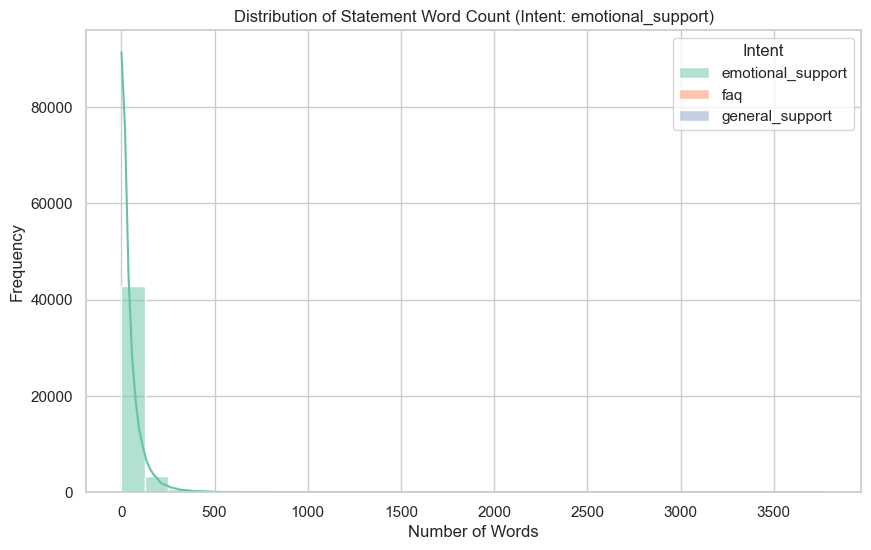

In [81]:
# Distribution of Input Word Counts by Intent
sns.histplot(data=df_unified_enriched, x='Statement_Word_Count', hue='Intent', bins=30, kde=True, palette='Set2')
plt.title('Distribution of Statement Word Count (Intent: emotional_support)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### Distribution of Question Word Count by Intent (FAQ)

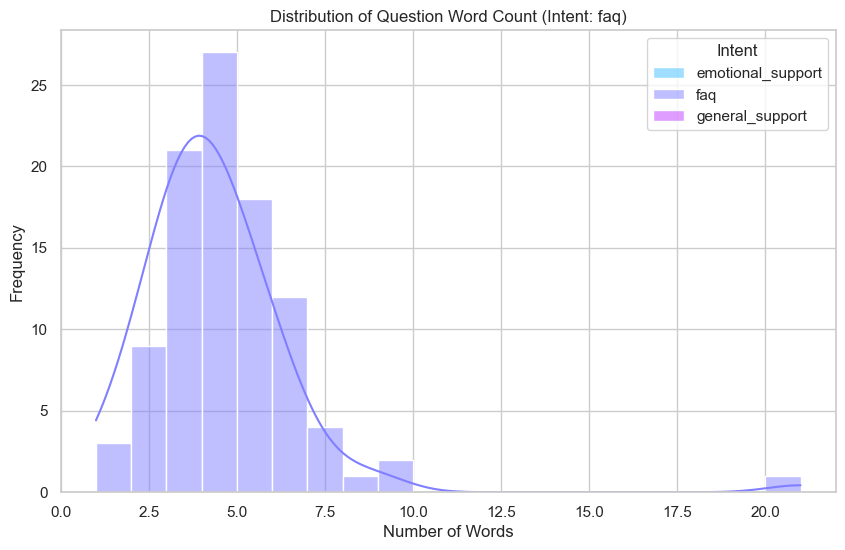

In [84]:
sns.histplot(data=df_unified_enriched, x='Question_Word_Count', hue='Intent', bins=20, kde=True, palette='cool')
plt.title('Distribution of Question Word Count (Intent: faq)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### Distribution of Response Word Count (Counseling)

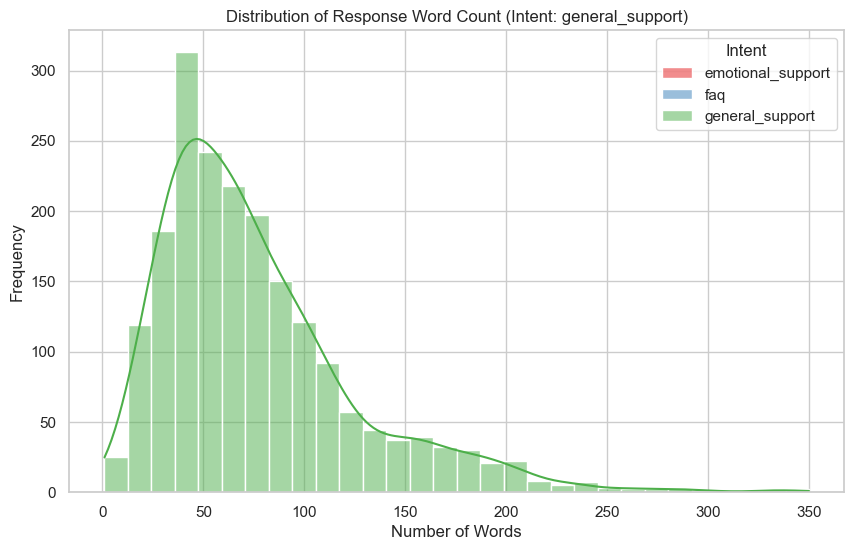

In [89]:
sns.histplot(data=df_unified_enriched, x='Response_Word_Count', hue='Intent', bins=30, kde=True, palette='Set1')
plt.title('Distribution of Response Word Count (Intent: general_support)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### Countplot for Has_Severe_Keyword feature (for emotional support)

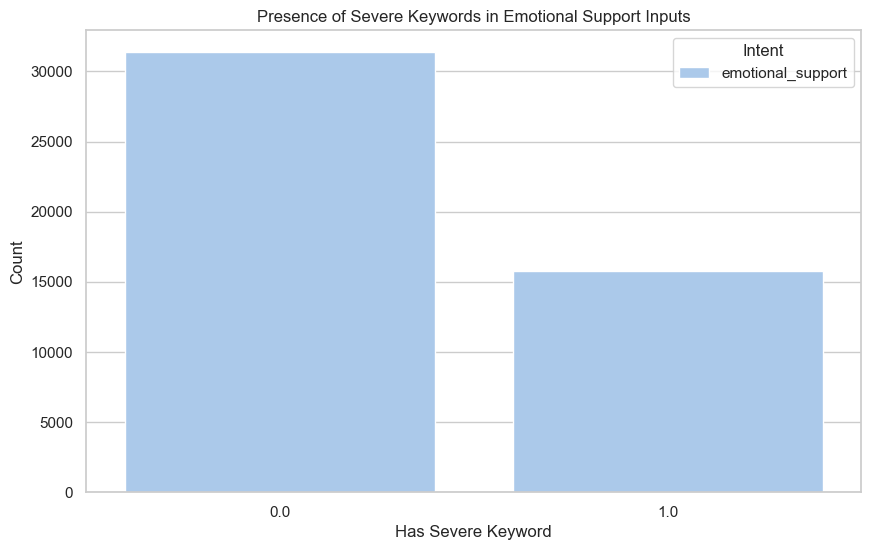

In [94]:
sns.countplot(
    data=df_unified_enriched[df_unified_enriched['Intent'] == 'emotional_support'],
    x='Has_Severe_Keyword', hue='Intent', palette='pastel')
plt.title('Presence of Severe Keywords in Emotional Support Inputs')
plt.xlabel('Has Severe Keyword')
plt.ylabel('Count')
plt.show()

### Countplot of Intent Classes

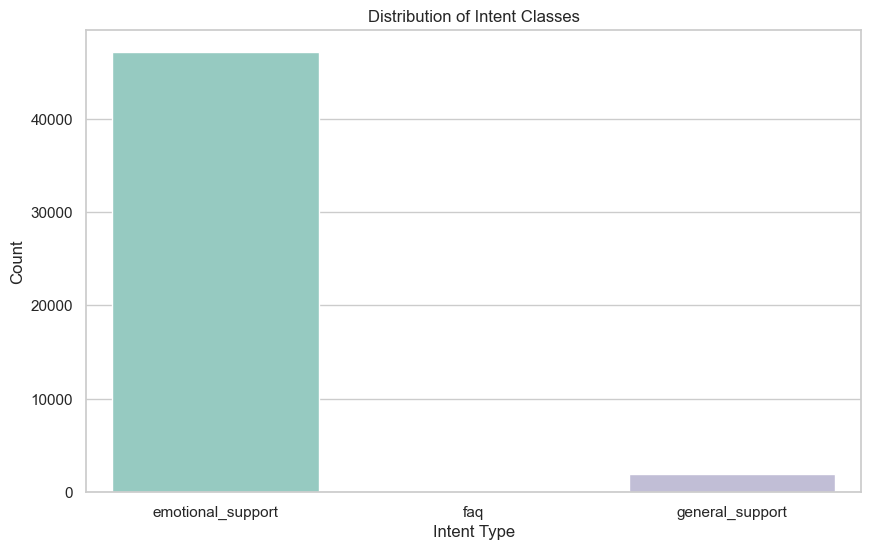

In [97]:
sns.countplot(data=df_unified_enriched, x='Intent', hue="Intent", palette='Set3')
plt.title('Distribution of Intent Classes')
plt.xlabel('Intent Type')
plt.ylabel('Count')
plt.show()

### Countplot of Top 10 Label Classes

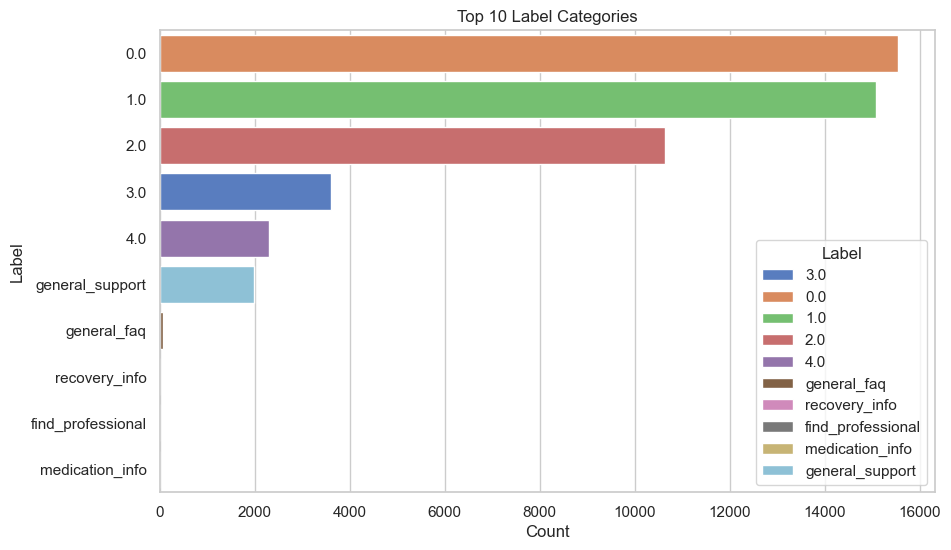

In [100]:
top_labels = df_unified_enriched['Label'].value_counts().nlargest(10).index
sns.countplot(data=df_unified_enriched[df_unified_enriched['Label'].isin(top_labels)],
              y='Label', hue='Label', palette='muted', order=top_labels)
plt.title('Top 10 Label Categories')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

### Correlation heatmap of numerical features

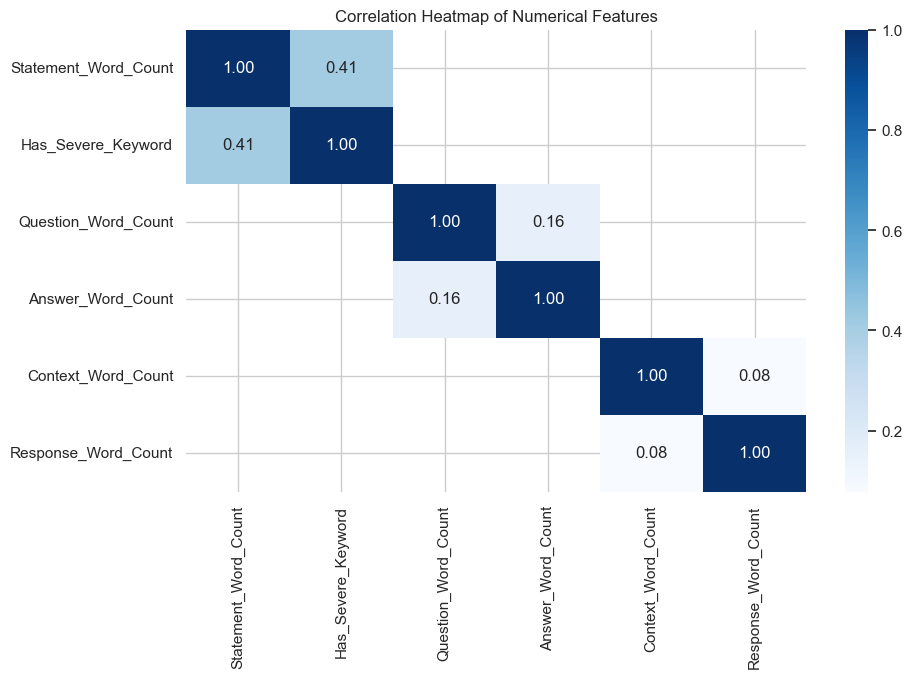

In [102]:
numeric_cols = df_unified_enriched.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## EDA Insights Relevant to Feature Engineering and Modeling

We explored multiple visualizations to guide and validate our feature engineering choices for the unified dataset used in chatbot modeling. Below is a breakdown of the insights and their relevance:

### 1. Distribution of Statement Word Count (Intent: emotional_support)
- The histogram is Heavily **Right-skewed**, with most messages under 50 words.
- Outliers span up to 3500+ words, indicating deep emotional expression.

**Modeling Impact:**
- Confirms that `Statement_Word_Count` is meaningful.
- Useful for detecting emotional complexity or severity.
- Extreme lengths can be truncated or treated separately.

---

### 2. Distribution of Question Word Count (Intent: faq)
- Short, focused queries dominate, typically **3–6 words** long.
- Reflects structured question patterns in the FAQ dataset.

**Modeling Impact:**
- `Question_Word_Count` is useful for distinguishing FAQ intent.
- Enables early filtering or routing in chatbot pipeline.

---

### 3. Distribution of Response Word Count (Intent: general_support)
- Therapist responses typically fall in the **40–100 word range**, with a long tail up to 300+.
  
**Modeling Impact:**
- Justifies using `Response_Word_Count` to evaluate or select appropriate-length replies.
- Helps simulate realistic, human-like support response generation.

---

### 4. Presence of Severe Keywords in Emotional Support Inputs
- Roughly one-third of emotional inputs contain high-risk keywords.
- Highlights a subset of emotionally urgent user needs.

**Modeling Impact:**
- `Has_Severe_Keyword` becomes critical for routing inputs to higher-sensitivity responses or safety flags.
- Adds nuance in sentiment or risk-aware classification.

---

### 5. Distribution of Intent Classes
- Severe class imbalance: `emotional_support` ≫ `general_support` ≫ `faq`.
  
**Modeling Impact:**
- Stratified data splitting is necessary.
- Resampling or class weighting should be applied during model training to prevent intent bias.

---

### 6. Top 10 Label Categories
- Most frequent labels come from sentiment (numeric), while FAQs and counseling labels are sparse.

**Modeling Impact:**
- Label types vary by intent, so feature relevance and class balance must be checked per task.
- Labels should be standardized (e.g., encoded to strings or integers) for multi-task models.

---

### 7. Correlation Heatmap of Numerical Features
- `Statement_Word_Count` and `Has_Severe_Keyword` are moderately correlated (0.41).
- Other features show minimal multicollinearity.

**Modeling Impact:**
- Confirms inclusion of all engineered features (no redundancy).
- Enables dimensionality reduction later if needed (e.g., PCA).
- Normalization may be required before modeling.

# Data Modeling

## Intent Classification Task

In [108]:
# Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Load Final enriched dataset
df_unified = pd.read_csv("/Users/satwik/Documents/GitHub/cap5771sp25-project/Data/Cleaned Data/Modeling_Dataset_Enriched.csv")

# Feature Selection (Relevant to this Classifier) : Select only relevant columns for Intent Classification
df_intent = df_unified[['Input', 'Intent']].dropna()

In [110]:
# 80-20% Data Split (Stratified)
X = df_intent['Input']
y = df_intent['Intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Models to Train : Logistic Regression, Multinomial Naive Bayes, Random Forest
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced')
}

In [116]:
# Evaluation
results = []
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)  # <- fix here
    print(f"{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, zero_division=0))   # <- fix here
    results.append((name, acc, f1))

# Showing Results
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Macro F1 Score"])
print("\nModel Performance Summary:")
print(df_results)

Logistic Regression Classification Report:

                   precision    recall  f1-score   support

emotional_support       0.99      0.95      0.97      9430
              faq       0.21      0.50      0.30        20
  general_support       0.47      0.90      0.62       396

         accuracy                           0.95      9846
        macro avg       0.56      0.79      0.63      9846
     weighted avg       0.97      0.95      0.96      9846

Multinomial Naive Bayes Classification Report:

                   precision    recall  f1-score   support

emotional_support       0.96      1.00      0.98      9430
              faq       0.00      0.00      0.00        20
  general_support       1.00      0.10      0.19       396

         accuracy                           0.96      9846
        macro avg       0.65      0.37      0.39      9846
     weighted avg       0.96      0.96      0.95      9846

Random Forest Classification Report:

                   precision    recall

## Selection of Best Model for Intent Classification :

- Among the three models evaluated for the intent classification task—Logistic Regression, Multinomial Naive Bayes, and Random Forest the **Random Forest Classifier** was identified as the most effective based on overall performance metrics.

- While Logistic Regression achieved high accuracy (95%) and demonstrated good performance on the dominant class (emotional_support), it struggled to correctly classify minority classes, particularly the faq intent. Multinomial Naive Bayes, although fast and efficient, exhibited poor generalization across classes, particularly failing to detect faq and general_support intents, which significantly reduced its macro-average F1 score.

- In contrast, the Random Forest classifier not only achieved the highest overall accuracy (98.5%) but also performed substantially better in terms of macro-averaged F1 score. It was able to capture instances from all three intent classes, including the minority ones, indicating superior robustness in handling class imbalance. This balanced performance across all classes makes Random Forest the most suitable model for intent classification in the current unified chatbot dataset.

# Label Classification Task

In [137]:
from sklearn.utils.multiclass import unique_labels

# Loop through each intent safely
for intent, config in intent_configs.items():
    print(f"\n--- Training models for Intent: {intent} ---")
    subset = df[df['Intent'] == intent].dropna(subset=config['features'] + ['Label'])
    X_text = subset['Input']
    y = subset['Label'].astype(str)
    numeric_features = [col for col in config['features'] if col != 'Input']
    X_numeric = subset[numeric_features]

    if len(y.unique()) < 2:
        print(f"Skipping {intent} - only 1 class present.")
        continue

    # Try stratified split, fallback if error
    try:
        X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
            X_text, X_numeric, y, test_size=0.2, random_state=42, stratify=y
        )
    except ValueError:
        print("Stratified split failed. Using regular split.")
        X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
            X_text, X_numeric, y, test_size=0.2, random_state=42
        )

    tfidf = TfidfVectorizer(max_features=3000)
    X_text_train_vec = tfidf.fit_transform(X_text_train)
    X_text_test_vec = tfidf.transform(X_text_test)

    scaler = StandardScaler()
    X_num_train_scaled = scaler.fit_transform(X_num_train)
    X_num_test_scaled = scaler.transform(X_num_test)

    X_train_final = scipy.sparse.hstack([X_text_train_vec, X_num_train_scaled])
    X_test_final = scipy.sparse.hstack([X_text_test_vec, X_num_test_scaled])

    for model_name, model in models.items():
        print(f"\n Training {model_name} on {intent}")

        try:
            model.fit(X_train_final, y_train)
            y_pred = model.predict(X_test_final)

            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='macro')

            print(f"Classification Report for {model_name} ({intent}):")
            print(classification_report(y_test, y_pred))

            results_label_classification.append({
                "Intent": intent,
                "Model": model_name,
                "Accuracy": acc,
                "Macro_F1": f1
            })

        except ValueError as e:
            print(f"Skipping {model_name} on {intent} due to error: {e}")



--- Training models for Intent: emotional_support ---

 Training Logistic Regression on emotional_support
Classification Report for Logistic Regression (emotional_support):
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      3108
         1.0       0.74      0.73      0.73      3017
         2.0       0.69      0.67      0.68      2127
         3.0       0.80      0.80      0.80       720
         4.0       0.68      0.44      0.53       458

    accuracy                           0.78      9430
   macro avg       0.76      0.72      0.73      9430
weighted avg       0.77      0.78      0.78      9430


 Training Random Forest on emotional_support
Classification Report for Random Forest (emotional_support):
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      3108
         1.0       0.64      0.80      0.71      3017
         2.0       0.69      0.51      0.59      2127
         3.0 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [139]:
# Final performance summary
df_results = pd.DataFrame(results_label_classification)
print("\n=== Model Performance Summary for Label Classification ===")
print(df_results)


=== Model Performance Summary for Label Classification ===
              Intent                Model  Accuracy  Macro_F1
0  emotional_support  Logistic Regression  0.779533  0.731776
1  emotional_support        Random Forest  0.743584  0.649719
2                faq  Logistic Regression  0.800000  0.300952
3                faq        Random Forest  0.900000  0.564532
4  emotional_support  Logistic Regression  0.779533  0.731776
5  emotional_support        Random Forest  0.743584  0.649719
6                faq  Logistic Regression  0.800000  0.300952
7                faq        Random Forest  0.900000  0.564532


### Label Classification: Model Evaluation and Selection

We trained two classification models (Logistic Regression and Random Forest) to predict the `Label` column based on user `Input` and relevant engineered features, grouped by each `Intent`. Below is a summary of model performance for each intent category:

#### **Intent: emotional_support**

- **Logistic Regression** achieved an accuracy of **78%** and a macro F1-score of **0.73**, showing strong performance on major emotional categories (e.g., depression, anxiety).
- **Random Forest** achieved 74% accuracy and a macro F1-score of 0.65, performing reasonably but struggling with minority classes.
- **Conclusion**: **Logistic Regression** can be selected as the best model due to its **Balanced recall and F1-scores** across all emotional classes.

---

#### **Intent: faq**

- Due to the **Small dataset size (n = 20)** and class imbalance, model performance varied widely.
- **Random Forest** performed best, with **90% accuracy** and a **macro F1-score of 0.56**, outperforming Logistic Regression (F1 = 0.30).
- **Conclusion**: Despite the small sample, **Random Forest** can be chosen for its superior handling of rare classes like `recovery_info` and `find_professional`.

---

#### **Intent: general_support**

- All entries under this intent share the **Same label (`general_support`)**, hence Label classification is not applicable.
- The model was skipped due to insufficient label diversity, which is a valid design decision.

---

### Final Model Selection for Label Classification

| Intent             | Selected Model      | Justification                                     |
|--------------------|---------------------|--------------------------------------------------|
| emotional_support  | Logistic Regression | Best F1 across all classes, stable on majority   |
| faq                | Random Forest       | Better handling of small and imbalanced classes  |
| general_support    | N/A                 | Only one label present; classification skipped   |

These selected models will be used in the chatbot pipeline to predict user context-specific labels and guide appropriate response generation.